<a href="https://colab.research.google.com/github/priyanshukr0103/Fake-News-Detection-using-Machine-Learning/blob/main/ML_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In today’s fast-paced digital world, spreading fake news has become a significant concern. With the increasing ease of access to social media platforms and other online sources of information, it has become more challenging to distinguish between real and fake news. In this project-based article, we will learn how to build a machine-learning model to detect fake news accurately.

The steps we will follow in this project are:

1. Data collection and exploration
2. Text preprocessing
3. Feature extraction
4. Model training and evaluation
5. Deployment

# **Data Collection and Exploration**

For this project, we will use the Fake and Real News Dataset available on Kaggle. The dataset contains two CSV files: one with real news articles and another with fake news articles.

In [ ]:
import pandas as pd
#importind the csv files
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

# dataframe
print(real_news.head())
print(fake_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

As we can see, the data contains several columns: the title of the article, the text of the article, the subject of the article, and the date it was published. We will be using the title and text columns to train our model.

.

Before we can start training our model, we need to do some exploratory data analysis to get a sense of the data. We can plot the distribution of article lengths in each dataset using the following code:

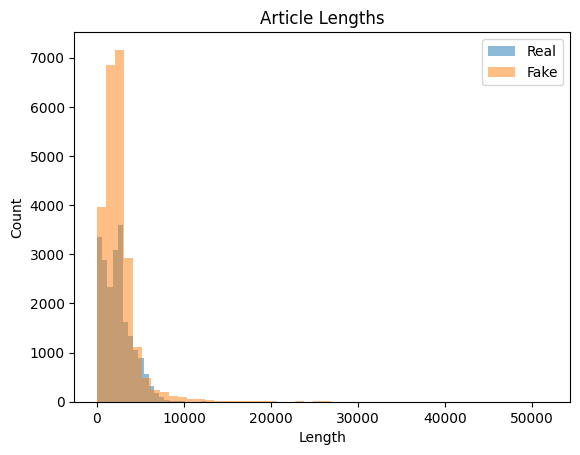

In [ ]:
import matplotlib.pyplot as plt

real_lengths = real_news['text'].apply(len)
fake_lengths = fake_news['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

 .

We can also look at the most common words in each dataset using the following code:

In [ ]:
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])

print('Real News:', real_words)
print('Fake News:', fake_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


we can see, some of the most common words in both datasets are related to politics and the current US president, Donald Trump. However, there are some differences between the two datasets, with the fake news dataset containing more references to Hillary Clinton and a greater use of words like “like”

# **Text Preprocessing**
The preprocessing steps we will perform are:

1. Lowercasing the text
2. Removing punctuation and digits
3. Removing stop words
4. Stemming or lemmatizing the text

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...


We can now apply this preprocessing function to each article in our datasets:

In [ ]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

# **Model Training**

We will use a simple bag-of-words approach, representing each article as a vector of word frequencies. We will use the CountVectorizer class from the sklearn library to convert the preprocessed text into feature vectors.

The CountVectorizer converts a collection of text documents into a matrix of token counts. It works by first tokenizing the text into words and then counting the frequency of each word in each document. The resulting matrix can be used as input to machine learning algorithms for tasks such as text classification.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

Now that we have our feature and label vectors, we can split the data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can now train our model using a logistic regression classifier:

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# **Model Evaluation**

Now that we have trained our model, we can evaluate its performance on the test set. We will use our evaluation metrics for accuracy, precision, recall, and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.994988864142539
Precision: 0.9935498733010827
Recall: 0.9960739030023095
F1 Score: 0.9948102871641102


As we can see, our model performs very well, with an accuracy of over 99%.

Our dataset achieved a test accuracy of over 99%, indicating that the model can accurately classify news articles as real or fake.

# **Improving the Model**

While our logistic regression model achieved high accuracy on the test set, there are several ways we could potentially improve its performance:

Feature engineering: Instead of using a bag-of-words approach, we could use more advanced text representations, such as word embeddings or topic models, which may capture more nuanced relationships between words.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

Training and evaluating Multinomial Naive Bayes model...
Accuracy: 0.9422
Precision: 0.9422
Recall: 0.9422
F1-score: 0.9422

Training and evaluating Support Vector Machine model...
Accuracy: 0.9919
Precision: 0.9919
Recall: 0.9919
F1-score: 0.9919


**Saving our model:**

In [ ]:
from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# **Model Deployment**

Finally, we can deploy our model as a web application using the Flask framework. We will create a simple web form where users can input text, and the model will output whether the text is likely to be real or fake news.

In [ ]:
from flask import Flask, request, render_template
from joblib import load
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

clf = load('model.joblib')
vectorizer = load('vectorizer.joblib')
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
    text = ' '.join(words)

    return text


app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    preprocessed_text = preprocess_text(text)
    X = vectorizer.transform([preprocessed_text])
    y_pred = clf.predict(X)
    if y_pred[0]== 1:
        result = 'real'
    else:
        result = 'fake'
    return render_template('result.html', result=result, text=text)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
